298
198
evaluate Initial w
-799.6658454098831  Initial likelihood
0 -542.2276230442031 -40.530650152719005 -10.852089660481996 0.3760162401572369 0.35171694851037955 accepted
50 61.98533432899448 -41.17551587043467 -0.0003805629961259327 0.19459232443126437 0.12321590482324493 accepted
100 65.42343409640539 -41.207522156462886 0 0.1923926598767181 0.12149781503416304 accepted
150 86.08404706382584 -40.801748947577906 -0.04785619131054142 0.1808312817869187 0.11527053057476105 accepted
200 95.69003337863899 -40.848323710273434 -0.01317474529781204 0.1754314932892045 0.10882362293531661 accepted
300 133.05132460451514 -40.48436455393675 0 0.15156990221508557 0.09346959530928785 accepted
350 146.50943916932462 -40.74919884877774 0 0.14793621674243373 0.08995044016969564 accepted
400 152.11550853683028 -40.62913221502104 -0.015792896191173744 0.14509722527521152 0.08953195733570084 accepted
550 182.10489377444128 -40.56100576010792 0 0.13132574651551732 0.07959557126653077 accepted
600 195

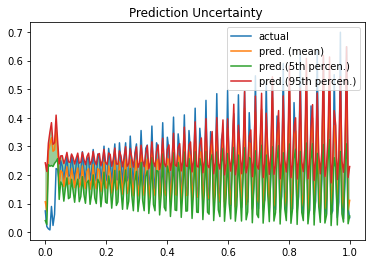

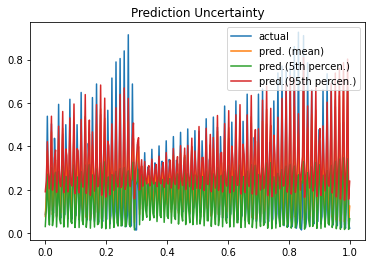

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

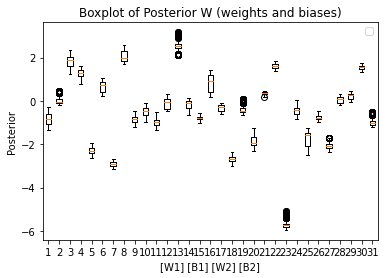

298
198
evaluate Initial w
-104.91959474352026  Initial likelihood
100 31.90592203120555 -41.42460712880711 -0.12308793722592165 0.2124197657438503 0.17568143370849706 accepted
400 374.99744712239317 -39.332252808445524 0 0.06866521159120642 0.059341290795859064 accepted
500 429.32533488721526 -39.2127740374726 -0.007343055404788024 0.056139696190392455 0.04275609043129917 accepted
650 454.9913927707664 -38.81409873362101 0 0.0525151060407497 0.04158966222281209 accepted
700 456.0348580034055 -39.02123657870206 -0.001733875163522025 0.05211782158812287 0.04062593673499222 accepted
850 476.7221349841961 -38.90796508497354 -0.003031446882033162 0.04886201020875312 0.040739937819201544 accepted
1050 480.7621918844677 -38.64983019939954 -0.004197285311832943 0.047845064117422634 0.03948395268042945 accepted
1150 497.88155812442324 -38.98337135239834 0 0.044938561400394005 0.037018614628764455 accepted
1300 525.7359038401157 -38.91407531132247 -0.0028547095354049534 0.041095437862654266 0.0

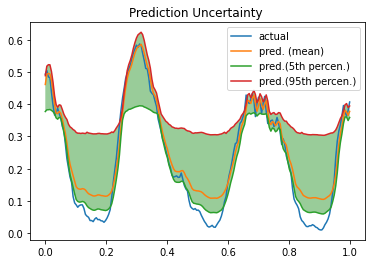

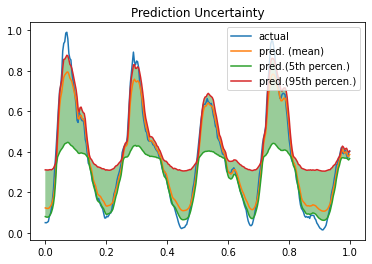

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

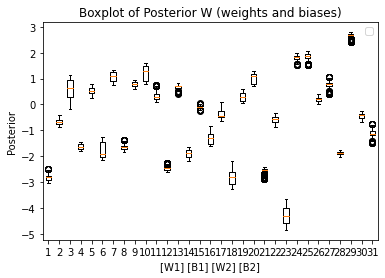

460
308
evaluate Initial w
-897.7537386060089  Initial likelihood
0 -782.8221415330281 -176.3704751071314 -1.7597319089841508 0.4575504050089367 0.4565642843033225 accepted
250 113.47980271845645 -176.3705786067748 0 0.18901920906684277 0.1877279095273381 accepted
300 119.67404850797558 -176.42604322189436 0 0.18586001075995123 0.18468757632378113 accepted
650 202.0829608498585 -176.31211930365333 0 0.15593716735511443 0.1557982741060509 accepted
1200 342.3489185096007 -176.52820637232963 0 0.11420163702762771 0.11767728508831654 accepted
1300 364.03638078047476 -176.31837517219276 -0.0012769028588086595 0.10928110702501141 0.11319269434751392 accepted
433  num accepted
0.2165 % was accepted
987  langevin_count
sucessfully sampled
2.590597661336263 min taken
0.1054870559420597 0.011336108277327303 0.11116864469955126 0.009027811766936619


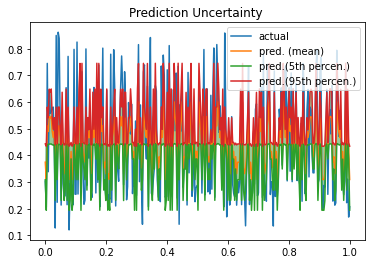

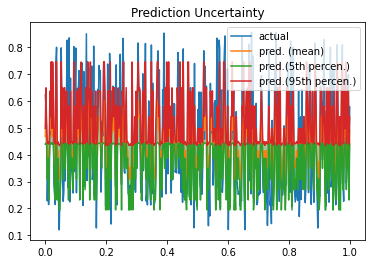

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

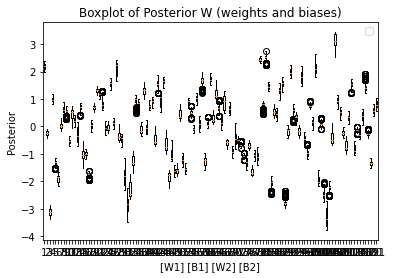

OSError: datasets/iris.csv not found.

<Figure size 432x288 with 0 Axes>

In [2]:
# !/usr/bin/python 

# Reference for publication for this code
# [Chandra_ICONIP2017] R. Chandra, L. Azizi, S. Cripps,
# 'Bayesian neural learning via Langevin dynamicsfor chaotic time series prediction', ICONIP 2017. 

# https://github.com/sydney-machine-learning/parallel-tempering-neural-net
# Chandra R; Jain K; Deo RV; Cripps S, 2019, 'Langevin-gradient parallel tempering for Bayesian neural learning', 
# Neurocomputing, vol. 359, pp. 315 - 326, http://dx.doi.org/10.1016/j.neucom.2019.05.082,  

import numpy as np
import random
import math
import time
import matplotlib.pyplot as plt
from math import exp

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import random
from numpy import *  
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split


# An example of a class
class Network:
    
    def __init__(self, Topo, Train, Test, learn_rate, prob_type):
        self.Top = Topo      # NN topology [input, hidden, output]
        self.TrainData = Train
        self.TestData = Test
        np.random.seed()
        self.lrate = learn_rate

        self.W1 = np.random.randn(self.Top[0], self.Top[1]) / np.sqrt(self.Top[0])
        self.B1 = np.random.randn(1, self.Top[1]) / np.sqrt(self.Top[1])    # bias first layer
        self.W2 = np.random.randn(self.Top[1], self.Top[2]) / np.sqrt(self.Top[1])
        self.B2 = np.random.randn(1, self.Top[2]) / np.sqrt(self.Top[1])    # bias second layer

        self.hidout = np.zeros((1, self.Top[1]))  # output of first hidden layer
        self.out = np.zeros((1, self.Top[2]))     # output last layer

        self.prob = prob_type
        

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    

    def softmax(self, out):
        prob = np.exp(out)/np.sum(np.exp(out))
        return prob
    

    def sampleEr(self, actualout):
        error = np.subtract(self.out, actualout)
        sqerror = np.sum(np.square(error)) / self.Top[2]
        return sqerror
    

    def ForwardPass(self, X):
        z1 = X.dot(self.W1) - self.B1
        self.hidout = self.sigmoid(z1)  # output of first hidden layer
        z2 = self.hidout.dot(self.W2) - self.B2
        self.out = self.sigmoid(z2)     # output second hidden layer
        

    def BackwardPass(self, Input, desired):

        if self.prob == 'classification':  # ensure that one-hot encoding is used in data - for classification problems
            onehot = np.zeros((desired.size, self.Top[2]))
            onehot[np.arange(desired.size), int(desired)] = 1
            desired = onehot.flatten()
            
        out_delta = (desired - self.out) * (self.out * (1 - self.out))
        hid_delta = out_delta.dot(self.W2.T) * (self.hidout * (1 - self.hidout))

        layer = 1  # hidden to output
        for x in range(0, self.Top[layer]):
            for y in range(0, self.Top[layer + 1]):
                self.W2[x, y] += self.lrate * out_delta[y] * self.hidout[x]
        for y in range(0, self.Top[layer + 1]):
            self.B2[y] += -1 * self.lrate * out_delta[y]

        layer = 0  # Input to Hidden
        for x in range(0, self.Top[layer]):
            for y in range(0, self.Top[layer + 1]):
                self.W1[x, y] += self.lrate * hid_delta[y] * Input[x]
        for y in range(0, self.Top[layer + 1]):
            self.B1[y] += -1 * self.lrate * hid_delta[y]

        # there is a bug when I used the vectorized version below - todo - fix later
        '''self.W2 += (self.hidout.T.dot(out_delta) * self.lrate)
        self.B2 += (-1 * self.lrate * out_delta)
        self.W1 += (Input.T.dot(hid_delta) * self.lrate)
        self.B1 += (-1 * self.lrate * hid_delta)'''
        

    def decode(self, w):
        w_layer1size = self.Top[0] * self.Top[1]
        w_layer2size = self.Top[1] * self.Top[2]

        w_layer1 = w[0:w_layer1size]
        self.W1 = np.reshape(w_layer1, (self.Top[0], self.Top[1]))

        w_layer2 = w[w_layer1size:w_layer1size + w_layer2size]
        self.W2 = np.reshape(w_layer2, (self.Top[1], self.Top[2]))
        self.B1 = w[w_layer1size + w_layer2size:w_layer1size + w_layer2size + self.Top[1]]
        self.B2 = w[w_layer1size + w_layer2size + self.Top[1]:w_layer1size + w_layer2size + self.Top[1] + self.Top[2]]
        

    def encode(self):
        w1 = self.W1.ravel()
        w2 = self.W2.ravel()
        w = np.concatenate([w1, w2, self.B1, self.B2])
        return w
    

    def langevin_gradient(self, data, w, depth):  # BP with SGD (Stocastic BP)

        self.decode(w)  # method to decode w into W1, W2, B1, B2.
        size = data.shape[0]

        Input = np.zeros((1, self.Top[0]))  # temp hold input
        Desired = np.zeros((1, self.Top[2]))
        fx = np.zeros(size)


        for i in range(0, depth):
            for i in range(0, size):
                pat = i
                Input = data[pat, 0:self.Top[0]]
                Desired = data[pat, self.Top[0]:]
                self.ForwardPass(Input)
                self.BackwardPass(Input, Desired)

        w_updated = self.encode()

        return  w_updated
    

    def evaluate_proposal(self, data, w):  # BP with SGD (Stocastic BP)

        self.decode(w)   # method to decode w into W1, W2, B1, B2.
        size = data.shape[0]

        Input = np.zeros((1, self.Top[0]))  # temp hold input
        Desired = np.zeros((1, self.Top[2]))
        fx = np.zeros(size)

        prob = np.zeros((size,self.Top[2]))

        for i in range(0, size):    # to see what fx is produced by your current weight update
            Input = data[i, 0:self.Top[0]]
            self.ForwardPass(Input)

            if self.prob == 'classification':
                fx[i] = np.argmax(self.out)  
                prob[i] = self.softmax(self.out)
            else:
                fx[i] = self.out  # regression problem

        return fx, prob

# --------------------------------------------------------------------------

class MCMC:
    
    def __init__(self, use_langevin_gradients, l_prob, learn_rate, samples, traindata, testdata, topology, prob_type):
        self.samples = samples    # NN topology [input, hidden, output]
        self.topology = topology  # max epocs
        self.traindata = traindata
        self.testdata = testdata 
        self.use_langevin_gradients = use_langevin_gradients
        self.l_prob = l_prob   # likelihood prob
        self.learn_rate = learn_rate
        self.prob = prob_type
        

    def rmse(self, predictions, targets):
        return np.sqrt(((predictions - targets) ** 2).mean())  # for one step prediction or one output neuron only
    

    def accuracy(self,pred,actual ):
        count = 0
        for i in range(pred.shape[0]):
            if pred[i] == actual[i]:
                count += 1 

        return 100*(count/pred.shape[0])


    def loglikelihood(self, neuralnet, data, w, tausq): 

        if self.prob == 'regression':
            [log_lhood, prediction, perf] = self.gaussian_loglikelihood(neuralnet, data, w, tausq)
        elif self.prob == 'classification':
            [log_lhood, prediction, perf] = self.multinomial_loglikelihood(neuralnet, data, w)

        return [log_lhood, prediction, perf]
    

    def prior(self, sigma_squared, nu_1, nu_2, w, tausq): 

        if self.prob == 'regression':
            logprior = self.prior_regression(sigma_squared, nu_1, nu_2, w, tausq)
        elif self.prob == 'classification':
            logprior = self.prior_classification(sigma_squared, nu_1, nu_2, w)

        return logprior
    

    def gaussian_loglikelihood(self, neuralnet, data, w, tausq): 

        y = data[:, self.topology[0]]
        fx, prob = neuralnet.evaluate_proposal(data, w) #ignore prob
        rmse = self.rmse(fx, y) 

        n = y.shape[0]  # will change for multiple outputs (y.shape[0]*y.shape[1])
        log_lhood = -n/2 * np.log(2 * math.pi * tausq) - (1/(2*tausq)) * np.sum(np.square(y - fx))
        return [log_lhood, fx, rmse]
    

    def prior_regression(self, sigma_squared, nu_1, nu_2, w, tausq):   # for weights and biases and tausq
        h = self.topology[1]    # number hidden neurons
        d = self.topology[0]    # number input neurons
        part1 = -1 * ((d * h + h + 2) / 2) * np.log(sigma_squared)
        part2 = 1 / (2 * sigma_squared) * (sum(np.square(w)))
        log_loss = part1 - part2 - (1 + nu_1) * np.log(tausq) - (nu_2 / tausq)
        return log_loss


    def multinomial_loglikelihood(self, neuralnet, data, w):
        y = data[:, self.topology[0]]
        fx, prob = neuralnet.evaluate_proposal(data,w)
        acc= self.accuracy(fx,y)
        z = np.zeros((data.shape[0],self.topology[2]))
        lhood = 0
        for i in range(data.shape[0]):
            for j in range(self.topology[2]):
                if j == y[i]:
                    z[i,j] = 1
                lhood += z[i,j]*np.log(prob[i,j])

        return [lhood, fx, acc]
    

    def prior_classification(self, sigma_squared, nu_1, nu_2, w):   # for weights and biases only
        h = self.topology[1]    # number hidden neurons
        d = self.topology[0]    # number input neurons
        part1 = -1 * ((d * h + h + self.topology[2]+h*self.topology[2]) / 2) * np.log(sigma_squared)
        part2 = 1 / (2 * sigma_squared) * (sum(np.square(w)))
        log_loss = part1 - part2
        return log_loss


    def sampler(self, w_limit, tau_limit):

        # Initialize MCMC
        testsize = self.testdata.shape[0]
        trainsize = self.traindata.shape[0]
        samples = self.samples

        self.sgd_depth = 1

        x_test = np.linspace(0, 1, num=testsize)
        x_train = np.linspace(0, 1, num=trainsize)

        netw = self.topology     # [input, hidden, output]
        y_test = self.testdata[:, netw[0]]
        y_train = self.traindata[:, netw[0]]
        print(y_train.size)
        print(y_test.size)

        w_size = (netw[0] * netw[1]) + (netw[1] * netw[2]) + netw[1] + netw[2]  # num of weights and bias

        pos_w = np.ones((samples, w_size))  # posterior of all weights and bias over all samples
        pos_tau = np.ones((samples, 1))

        fxtrain_samples = np.ones((samples, trainsize))  # fx of train data over all samples
        fxtest_samples = np.ones((samples, testsize))    # fx of test data over all samples
        perf_train = np.zeros(samples)
        perf_test = np.zeros(samples)

        w = np.random.randn(w_size)
        w_proposal = np.random.randn(w_size)

        #step_w = 0.05;   # defines how much variation you need in changes to w
        #step_eta = 0.2;  # exp 0

        step_w = w_limit       # defines how much variation you need in changes to w
        step_eta = tau_limit   # exp 1
        # Declare FNN and initialize

        neuralnet = Network(self.topology, self.traindata, self.testdata, self.learn_rate, self.prob)
        print('evaluate Initial w')

        pred_train, prob = neuralnet.evaluate_proposal(self.traindata, w) # ignore prob in case of regression problems
        pred_test, prob = neuralnet.evaluate_proposal(self.testdata, w)

        if self.prob == 'regression':
            eta = np.log(np.var(pred_train - y_train))
            tau_pro = np.exp(eta)
        else:    # not used in case of classification
            eta = 0
            tau_pro = 0

        sigma_squared = 25
        nu_1 = 0
        nu_2 = 0

        sigma_diagmat = np.zeros((w_size, w_size))  # for Equation 9 in Ref [Chandra_ICONIP2017]
        np.fill_diagonal(sigma_diagmat, step_w)

        delta_likelihood = 0.5    # an arbitrary position

        prior_current = self.prior(sigma_squared, nu_1, nu_2, w, tau_pro)  # takes care of the gradients

        [likelihood, pred_train, p_train] = self.loglikelihood(neuralnet, self.traindata, w, tau_pro) 
        [likelihood_ignore, pred_test, p_test] = self.loglikelihood(neuralnet, self.testdata, w, tau_pro)

        print(likelihood, ' Initial likelihood')

        naccept = 0

        langevin_count = 0

        for i in range(samples - 1):

            lx = np.random.uniform(0,1,1)

            if (self.use_langevin_gradients is True) and (lx< self.l_prob):
                
                w_gd = neuralnet.langevin_gradient(self.traindata, w.copy(), self.sgd_depth)  
                w_proposal = np.random.normal(w_gd, step_w, w_size)  
                w_prop_gd = neuralnet.langevin_gradient(self.traindata, w_proposal.copy(), self.sgd_depth) 
                #first = np.log(multivariate_normal.pdf(w, w_prop_gd, sigma_diagmat)) 
                #second = np.log(multivariate_normal.pdf(w_proposal, w_gd, sigma_diagmat)) 
                # this gives numerical instability - hence we give a simple implementation next that takes out log 

                wc_delta = (w- w_prop_gd) 
                wp_delta = (w_proposal - w_gd )

                sigma_sq = step_w

                first = -0.5 * np.sum(wc_delta * wc_delta) / sigma_sq  # this is wc_delta.T * wc_delta / sigma_sq
                second = -0.5 * np.sum(wp_delta * wp_delta) / sigma_sq

                diff_prop = first - second  
                langevin_count = langevin_count + 1

            else:
                diff_prop = 0
                w_proposal = np.random.normal(w, step_w, w_size)


            if self.prob == 'regression': 
                eta_pro = eta + np.random.normal(0, step_eta, 1)
                tau_pro = math.exp(eta_pro)
                
            else:     # not used in case of classification
                eta_pro = 0
                tau_pro = 0


            [likelihood_proposal, pred_train, p_train] = self.loglikelihood(neuralnet, self.traindata, 
                                                                            w_proposal, tau_pro)
            [likelihood_ignore, pred_test, p_test] = self.loglikelihood(neuralnet, self.testdata, 
                                                                        w_proposal, tau_pro) 

            prior_prop = self.prior(sigma_squared, nu_1, nu_2, w_proposal, tau_pro)  # takes care of the gradients

            diff_prior = prior_prop - prior_current

            diff_likelihood = likelihood_proposal - likelihood

            #mh_prob = min(1, math.exp(diff_likelihood + diff_prior + diff_prop))

            try:
                mh_prob = min(1, math.exp(diff_likelihood + diff_prior + diff_prop))

            except OverflowError as e:
                mh_prob = 1

            u = random.uniform(0, 1)

            if u < mh_prob:
                # Update position 
                naccept += 1
                likelihood = likelihood_proposal
                prior_current = prior_prop
                w = w_proposal
                eta = eta_pro #only used for regression
                if i%50==0:
                    print(i,likelihood, prior_current, diff_prop, p_train, p_test, 'accepted')

                pos_w[i + 1,] = w_proposal
                pos_tau[i + 1,] = tau_pro  #only used for regression
                fxtrain_samples[i + 1,] = pred_train
                fxtest_samples[i + 1,] = pred_test

                #if self.prob == 'regression':
                perf_train[i + 1,] = p_train
                perf_test[i + 1,] = p_test 

            else:
                pos_w[i + 1,] = pos_w[i,]
                pos_tau[i + 1,] = pos_tau[i,]    # only used for regression
                fxtrain_samples[i + 1,] = fxtrain_samples[i,]
                fxtest_samples[i + 1,] = fxtest_samples[i,]
                perf_train[i + 1,] = perf_train[i,]
                perf_test[i + 1,] = perf_test[i,]

        print(naccept, ' num accepted')
        print(naccept / (samples * 1.0), '% was accepted')
        accept_ratio = naccept / (samples * 1.0) * 100

        print(langevin_count, ' langevin_count')

        return (pos_w, pos_tau, fxtrain_samples, fxtest_samples, x_train, x_test, perf_train, perf_test, accept_ratio)

# class ends
 
def scikit_linear_mod(x_train, x_test, y_train, y_test): # in case we want to compare with other models in future
 
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(x_train, y_train)

    y_pred = regr.predict(x_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  
    rsquared = r2_score(y_test, y_pred) 

    return rmse, rsquared, regr.coef_


def main():
    
    for problem in range(1, 6): 

        # todo - extend to multiple outputs in case of regression problems

        # works with binary and multi class classification problems

        w_limit = 0.025   # step size for w
        tau_limit = 0.2   # step size for eta

        if problem == 1:
            traindata = np.loadtxt("datasets/Lazer/train.txt")
            testdata = np.loadtxt("datasets/Lazer/test.txt")
            name = "Lazer"
            hidden = 5
            input = 4
            output = 1
            prob_type = 'regression'
            
        if problem == 2:
            traindata = np.loadtxt("datasets/Sunspot/train.txt")
            testdata = np.loadtxt("datasets/Sunspot/test.txt")
            name = "Sunspot"
            hidden = 5
            input = 4
            output = 1
            prob_type = 'regression' 

        if problem == 3: 
            filename = 'datasets/energy/ENB2012_data.csv'
            data_in = genfromtxt(filename, delimiter=",") # in case of csv data 
            data_inputx = data_in[:,0:8]   
            transformer = Normalizer().fit(data_inputx)  # fit does nothing
            data_inputx = transformer.transform(data_inputx)
            data_inputy = data_in[:,8]/50
            # this is target - so that last col is selected from data- we normlise the targe [0,1]
            percent_test = 0.4
            x_train, x_test, y_train, y_test = train_test_split(data_inputx, data_inputy, 
                                                                test_size=percent_test, random_state=0)

            traindata = np.column_stack((x_train,y_train)) # we need to do this since our code takes data in this format
            testdata = np.column_stack((x_test,y_test))
            name = "Energy"
            hidden = 12
            input = 8
            output = 1 
            prob_type = 'regression'

        if problem == 4:
            data = np.genfromtxt('datasets/iris/iris.csv', delimiter=';')
            classes = data[:,4].reshape(data.shape[0],1)-1
            features = data[:,0:4]   # Normalizing Data

            name = "Iris"
            hidden = 12
            input = 4    # input
            output = 3

            for k in range(input):
                mean = np.mean(features[:,k])
                dev = np.std(features[:,k])
                features[:,k] = (features[:,k]-mean)/dev
                
            train_ratio = 0.7   # choose
            indices = np.random.permutation(features.shape[0])
            
            traindata = np.hstack([features[indices[:np.int(train_ratio*features.shape[0])],:],
                                   classes[indices[:np.int(train_ratio*features.shape[0])],:]])
            
            testdata = np.hstack([features[indices[np.int(train_ratio*features.shape[0])]:,:],
                                  classes[indices[np.int(train_ratio*features.shape[0])]:,:]])
            
            prob_type = 'classification'

        if problem == 5:
            traindata = np.genfromtxt('datasets/ionesphere/ftrain.csv',delimiter=',')[:,:-1]
            testdata = np.genfromtxt('datasets/ionesphere/ftest.csv',delimiter=',')[:,:-1]
            name = "Ionosphere"
            hidden = 50
            input = 34     # input
            output = 2
            prob_type = 'classification'

        # in classification problems, classification accuracy is reported and in regression problems, RMSE is reported. 
        # Note that in regression problems, the response variable is supposed to be in range [0,1] for the current proposal distrubution (step size in randomwalk and Langevin grads)

        topology = [input, hidden, output] 

        numSamples = 2000  # need to decide yourself
        use_langevin_gradients  = True
        l_prob = 0.5
        learn_rate = 0.01

        timer = time.time() 
        mcmc = MCMC(use_langevin_gradients, l_prob, learn_rate, numSamples, traindata, testdata, topology, prob_type)
        # declare class

        [pos_w, pos_tau, fx_train, fx_test, x_train, x_test, p_train, p_test, accept_ratio] = mcmc.sampler(w_limit, tau_limit)
        print('sucessfully sampled')

        burnin = 0.5 * numSamples  # use post burn in samples

        timer2 = time.time()

        timetotal = (timer2 - timer) / 60
        print((timetotal), 'min taken')

        pos_w = pos_w[int(burnin):, ]
        pos_tau = pos_tau[int(burnin):, ]

        fx_mu = fx_test.mean(axis=0)
        fx_high = np.percentile(fx_test, 95, axis=0)
        fx_low = np.percentile(fx_test, 5, axis=0)

        fx_mu_tr = fx_train.mean(axis=0)
        fx_high_tr = np.percentile(fx_train, 95, axis=0)
        fx_low_tr = np.percentile(fx_train, 5, axis=0)

        pos_w_mean = pos_w.mean(axis=0) 

        p_tr = np.mean(p_train[int(burnin):])
        ptr_std = np.std(p_train[int(burnin):])
        p_tes = np.mean(p_test[int(burnin):])
        ptest_std = np.std(p_test[int(burnin):])
        print(p_tr, ptr_std, p_tes, ptest_std)

        #outres_db = open('result.txt', "a+")

        np.savetxt("results/bnn_regclf_results.txt", (use_langevin_gradients, learn_rate, p_tr, ptr_std, 
                                                       p_tes, ptest_std, accept_ratio, timetotal), fmt='%1.5f')

        ytestdata = testdata[:, input]
        ytraindata = traindata[:, input]

        if prob_type == 'regression':
            plt.plot(x_test, ytestdata, label='actual')
            plt.plot(x_test, fx_mu, label='pred. (mean)')
            plt.plot(x_test, fx_low, label='pred.(5th percen.)')
            plt.plot(x_test, fx_high, label='pred.(95th percen.)')
            plt.fill_between(x_test, fx_low, fx_high, facecolor='g', alpha=0.4)
            plt.legend(loc='upper right')
            plt.title("Prediction Uncertainty")
            plt.savefig('figures/bnn_regclf_mcmcrestest.png')
            plt.show()
            plt.clf()
            
            # -----------------------------------------
            plt.plot(x_train, ytraindata, label='actual')
            plt.plot(x_train, fx_mu_tr, label='pred. (mean)')
            plt.plot(x_train, fx_low_tr, label='pred.(5th percen.)')
            plt.plot(x_train, fx_high_tr, label='pred.(95th percen.)')
            plt.fill_between(x_train, fx_low_tr, fx_high_tr, facecolor='g', alpha=0.4)
            plt.legend(loc='upper right')
            plt.title("Prediction Uncertainty")
            plt.savefig('figures/bnn_regclf_mcmcrestrain.png')
            plt.show()
            plt.clf()
            
            # -----------------------------------------
            mpl_fig = plt.figure()
            ax = mpl_fig.add_subplot(111)
            ax.boxplot(pos_w)
            ax.set_xlabel('[W1] [B1] [W2] [B2]')
            ax.set_ylabel('Posterior')
            plt.legend(loc='upper right')
            plt.title("Boxplot of Posterior W (weights and biases)")
            plt.savefig('figures/bnn_regclf_w_pos.png')
            plt.show()
            plt.clf()


if __name__ == "__main__": 
    main()